In [1]:
from pymicrostructure.markets.continuous import ContinuousDoubleAuction
from pymicrostructure.traders.market_maker import *
from pymicrostructure.traders.informed import *
from pymicrostructure.traders.noise import *
from pymicrostructure.traders.strategy import *

from pymicrostructure.visualization.summary import participant_comparison, price_path
from pymicrostructure.metrics.trader import participants_report

In [2]:
market   = ContinuousDoubleAuction(initial_fair_price=1000)

mm       = BaseMarketMaker(market,
                           fair_price_strategy=OrderFlowMagnitudeFairPrice(window=10, aggressiveness=1),
                           volume_strategy=MaxFractionVolume(fraction=0.1), 
                           spread_strategy=OrderFlowImbalanceSpread(window=5, aggressiveness=10, min_halfspread=3),
                           max_inventory=1000)

informed = TWAPInformedTrader(market)
noise    = NoiseTrader(market, submission_rate=1, volume_size=lambda:np.random.randint(1, 5))

market.run(300)

100%|██████████| 300/300 [00:00<00:00, 19757.74it/s]


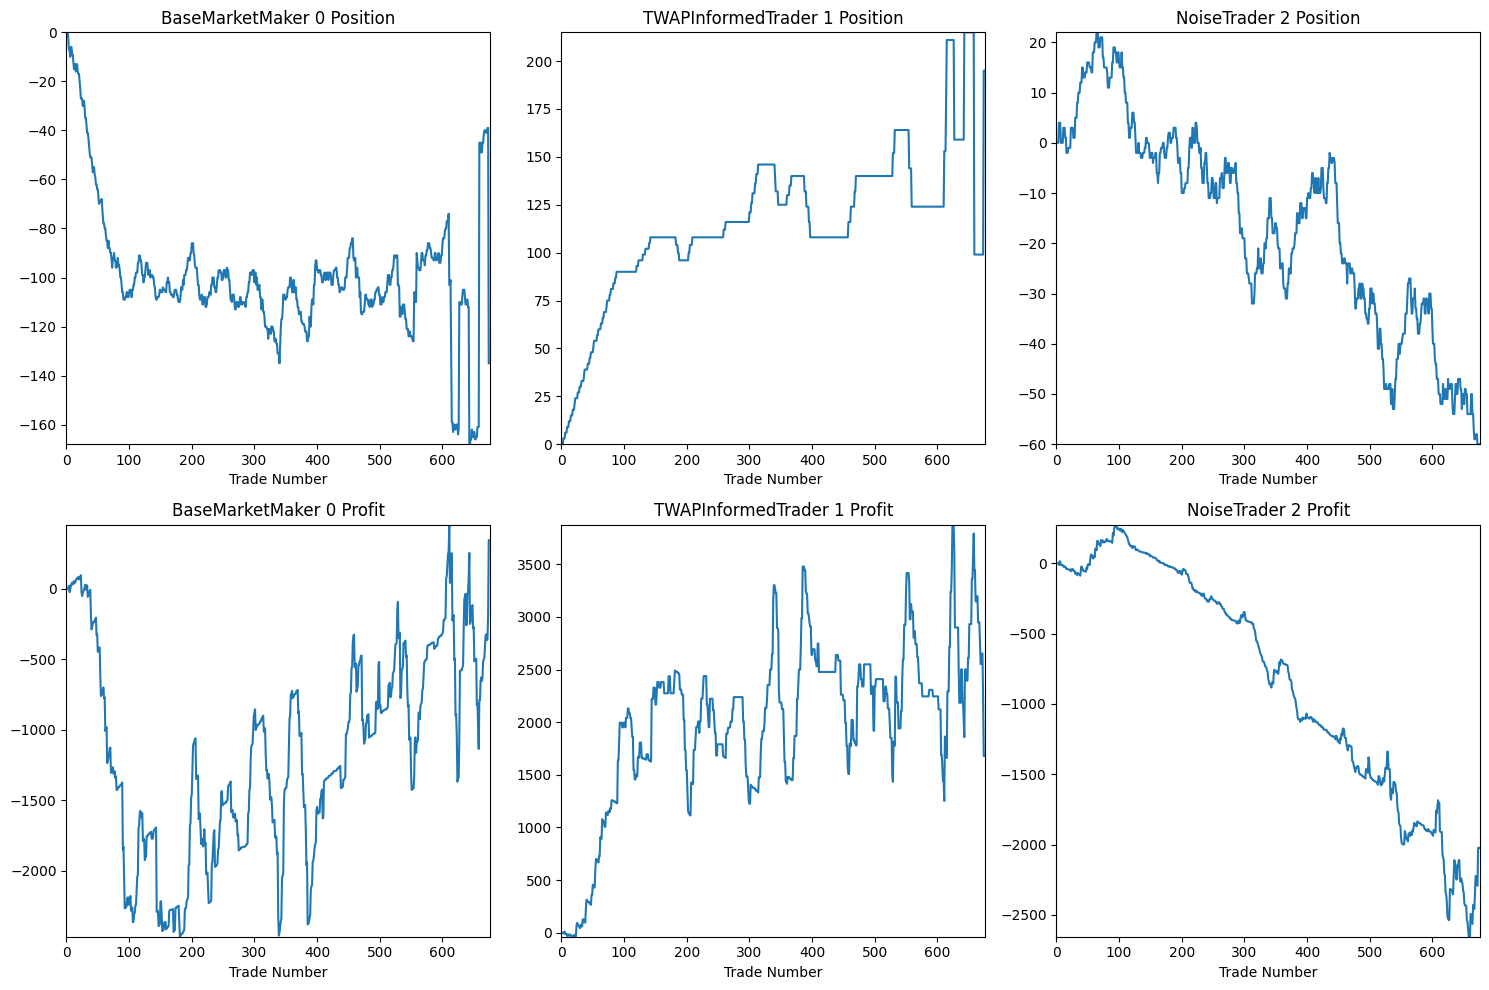

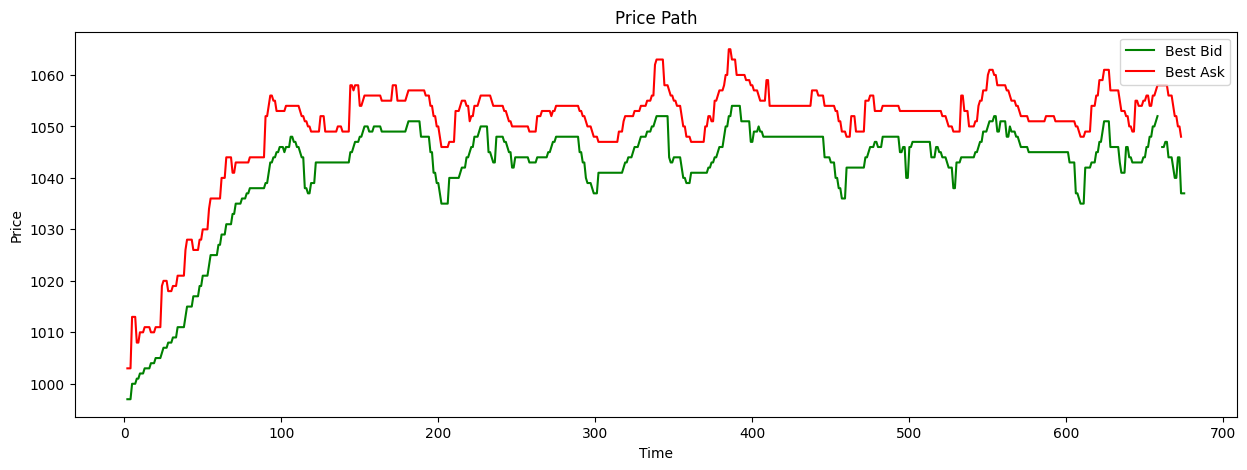

In [3]:
participant_comparison(market.participants)
price_path(market)

In [4]:
participants_report(market.participants)

,BaseMarketMaker_0,TWAPInformedTrader_1,NoiseTrader_2
final_profit,344.50,1678.50,-2023.00
final_position,-135.00,195.00,-60.00
profit_per_state,0.51,2.49,-3.00
std_profit_per_state,110.42,132.57,32.76
information_ratio,0.00,0.02,-0.09
total_trades,372.00,75.00,297.00
volume_traded,1469.00,741.00,728.00
profit_per_volume,0.23,2.27,-2.78
average_trade_size,3.95,9.88,2.45
fill_rate,0.00,0.00,0.00


In [5]:
df = participants_report(market.participants)

In [6]:
from pymicrostructure.metrics.market import quoted_spread

<Axes: >

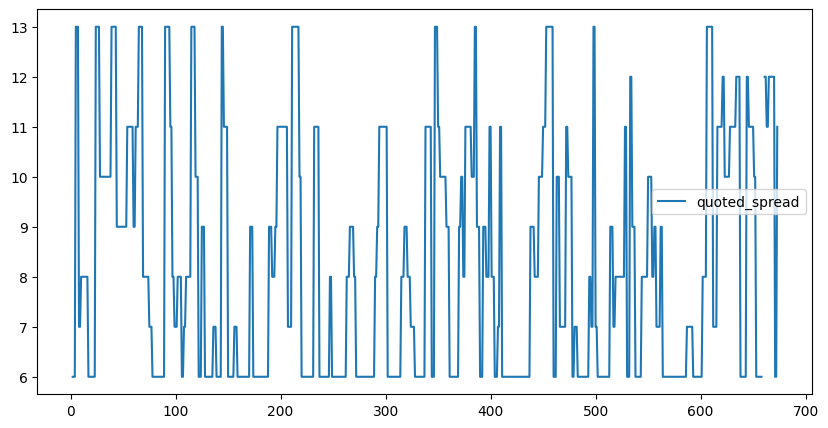

In [7]:
quoted_spread(market).plot(figsize=(10, 5))